<center>
    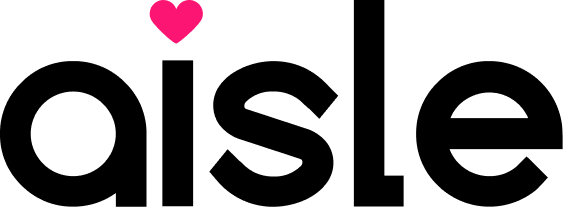
</center>

<p align='center'> Nothing Casual about this dating app </p>

# **Assignment : Data Analyst @ Aisle**

**Candidate Details**

Name : **SWAROOP N C**

email id : ncswaroop1997@gmail.com

Mobile : +919916160739

Concerned HR : **Resma Tony, Bahashree Bhat**


**## Key Instructions:**

*   **Console interface** is enough. 
*   Try to write **production quality code** instead of write-once and throw kind of code (refactor into small, recognizable modules, use frameworks where needed to save code, write tests, etc. No need for CI, or scale-out in mind, though.)
*   Please use **object oriented design** when designing your code. 

**Submission Format :**
* first problem: share your code via Github. ( code : accessible publicly)
* second problem, only the SQL query is required. 





## **Problem 1: Sales Tax**

**Basic sales tax = 10%** on all goods, ***exemptions*** : books, food, and medical products 


**Import duty     = 5% additional sales tax** on all imported goods with ***no exemptions***

When I **purchase** items I receive **receipt** which lists **name of items & price (including tax)** , finishing **with total cost of items, & total amounts of sales taxes paid**

**rounding rules for sales tax** are that for **tax rate of n%, shelf price of p** contains (**np/100** rounded up to  **nearest 0.05**) amount of **sales tax**



Write **application in Python** that **prints out the receipt details for these shopping baskets.** 

**Sample Inputs & Outputs ( Test Cases )**

**Case 1 :**

**Input 1:**

1 book at 12.49 

1 music CD at 14.99

1 chocolate bar at 0.85

**Output 1:**

 1 book: 12.49

 1 music CD: 16.49

 1 chocolate bar: 0.85 
 
 ***Sales Taxes: 1.50 Total: 29.83***



**Case 2 :**

**Input 2:**

1 imported box of chocolates at 10.00 

1 imported bottle of perfume at 47.50 

**Output 2:**

 1 imported box of chocolates: 10.50 
 
 1 imported bottle of perfume: 54.65 
 
 ***Sales Taxes: 7.65 Total: 65.15***



**Case 3 :**

**Input 3:**

1 imported bottle of perfume at 27.99 1 bottle of perfume at 18.99

 1 packet of headache pills at 9.75

 1 box of imported chocolates at 11.25 

**Output 3:**

1 imported bottle of perfume: 32.19 1 bottle of perfume: 20.89

 1 packet of headache pills: 9.75

 1 imported box of chocolates: 11.85 
 
***Sales Taxes: 6.70 Total: 74.68***

In [ ]:
class Constant(object):
    PARSE_DESCRIPTION_PATTERN = "(\d+)\s((imported\s)?\w+(\s\w+)*)\sat\s(\d+\.\d+)"
    COUNT_INDEX = 1
    NAME_INDEX = 2
    PRICE_INDEX = 5
    BOOK = ["book"]
    FOOD = ["chocolate bar", "box of chocolates"]
    MEDICAL = ["packet of headache pills"]
    BASE_TAXES = 0.1
    IMPORTED_TAXES = 0.05
    TAX_RATE_MIN_RANGE = 0.05
    IMPORTED_TEXT_IDENTIFY = "imported"
    SALES_TAXES_TEXT_IDENTIFY = "Sales Taxes: "
    TOTAL_TEXT_IDENTIFY = "Total: "

class NoTax:
    
    def __init__(self):
        pass

    def tax_rate(self, name):
        return 0

class BaseTax(NoTax):
    def tax_rate(self, name):
        return Constant.BASE_TAXES

class ImportedTax(NoTax):
    def tax_rate(self, name):
        return Constant.IMPORTED_TAXES

class TaxFactory:
    @staticmethod
    def build(name):
        taxes = [NoTax()]
        if TaxFactory.__item_not_in_exemptions_list(name):
            taxes.append(BaseTax())
        if TaxFactory.__item_is_imported(name):
            taxes.append(ImportedTax())
        return taxes

    @staticmethod
    def __item_not_in_exemptions_list(name):
        item_name = name.replace("%s " % Constant.IMPORTED_TEXT_IDENTIFY, "")
        return item_name not in Constant.BOOK + Constant.FOOD + Constant.MEDICAL

    @staticmethod
    def __item_is_imported(name):
        return Constant.IMPORTED_TEXT_IDENTIFY in name

class TaxRate():
    def __init__(self):
        pass

    def tax_rate(self, name):
        taxes = TaxFactory.build(name)
        tax_rate = 0
        for tax in taxes:
            tax_rate += tax.tax_rate(name)
        return tax_rate

import re

class Item:
    def __init__(self, description):
        match = re.search(Constant.PARSE_DESCRIPTION_PATTERN, description)
        self.count = match.group(Constant.COUNT_INDEX)
        self.name = match.group(Constant.NAME_INDEX)
        self.source_price = float(match.group(Constant.PRICE_INDEX))

    def sale(self):
        return str("%s %s: %.2f" % (self.count, self.name, self.price()))

    def tax(self):
        price = round(self.source_price * TaxRate().tax_rate(self.name), 2)
        mod = price % Constant.TAX_RATE_MIN_RANGE
        return price if mod == 0 else price + (Constant.TAX_RATE_MIN_RANGE - mod)

    def price(self):
        return round(self.source_price + self.tax(), 2)

class Items:
    def __init__(self, items):
        self.items = items

    def tax(self):
        tax = 0
        for item in self.items:
            tax += item.tax()
        return str((Constant.SALES_TAXES_TEXT_IDENTIFY + "%.2f") % tax)

    def total(self):
        total = 0
        for item in self.items:
            total += item.price()
        return str((Constant.TOTAL_TEXT_IDENTIFY + "%.2f") % total)

In [ ]:
class ItemTestCase():
    def __init__(self):
        print("-------------------------------------------------------")
        n=int(input(" Enter number of items in the order = "))
        print("-------------------------------------------------------")

        il=[]
        ol=[]

        ip=[]
        op=[]

        for i in range(n):
            item = Item(input("  Enter item : "))
            il.append(item)
            ip.append(item.price()-item.tax())
            result = item.sale()
            ol.append(result)
            op.append(item.price())
        print("                                                       ")
        print(" ----------------------------------------------------- ")
        print("                  AISLE SUPER MARKET                   ")
        print(" ----------------------------------------------------- ")
        print("  244, 6th Cross, IndiraNagar II Stage, Hoysala Nagar  ")
        print('       Indiranagar, Bengaluru, Karnataka 560038        ')
        print(" ----------------------------------------------------- ")
        print("                     TAX - INVOICE                     ")
        print(" ----------------------------------------------------- ")
        print("  GSTIN : 24AISLE1206D1ZM         FSSAI:1152209123343  ")
        print(" ----------------------------------------------------- ")
        for k in ip:
            k=float(k)
        for m in op:
            m=float(m)
        #get date and time
        from datetime import datetime
        import pytz
        IST = pytz.timezone('Asia/Kolkata')
        datetime_ist = datetime.now(IST)
        print("         Date & Time : ",datetime_ist.strftime('%d-%m-%Y %H:%M:%S'),'           ')
        print(" ----------------------------------------------------- ")
        print("                    Items Description                  ")
        print(" ----------------------------------------------------- ")
        for g in ol :
            print('  ',g)
        taxable_amount=round(sum(ip),2)
        
        total=round(sum(op),2)
        
        salestax=round(total-taxable_amount,2)
        print(" ----------------------------------------------------- ")
        print("  Taxable Bill Amount :",taxable_amount)
        print(" ----------------------------------------------------- ")
        print("  Sales tax Applicable: ",salestax)
        print(" ----------------------------------------------------- ")
        print("  Total Payable Amount:",total)
        print(" ----------------------------------------------------- ")
        print("                       CASH PAID                       ")
        print(" ----------------------------------------------------- ")
        print("    This is Computer generated Bill,No sign required   ")
        print(" ----------------------------------------------------- ")      
        print("               Thank You, Visit Us Again               ")
        print(" ----------------------------------------------------- ")

Test Cases : Inputs & Outputs


In [ ]:
TestCase1 = ItemTestCase()

-------------------------------------------------------
 Enter number of items in the order = 3
-------------------------------------------------------
  Enter item : 1 book at 12.49
  Enter item : 1 music CD at 14.99
  Enter item : 1 chocolate bar at 0.85
                                                       
 ----------------------------------------------------- 
                  AISLE SUPER MARKET                   
 ----------------------------------------------------- 
  244, 6th Cross, IndiraNagar II Stage, Hoysala Nagar  
       Indiranagar, Bengaluru, Karnataka 560038        
 ----------------------------------------------------- 
                     TAX - INVOICE                     
 ----------------------------------------------------- 
  GSTIN : 24AISLE1206D1ZM         FSSAI:1152209123343  
 ----------------------------------------------------- 
         Date & Time :  17-06-2022 17:13:08            
 ----------------------------------------------------- 
               

In [ ]:
TestCase2 = ItemTestCase()

-------------------------------------------------------
 Enter number of items in the order = 2
-------------------------------------------------------
  Enter item : 1 imported box of chocolates at 10.00
  Enter item : 1 imported bottle of perfume at 47.50
                                                       
 ----------------------------------------------------- 
                  AISLE SUPER MARKET                   
 ----------------------------------------------------- 
  244, 6th Cross, IndiraNagar II Stage, Hoysala Nagar  
       Indiranagar, Bengaluru, Karnataka 560038        
 ----------------------------------------------------- 
                     TAX - INVOICE                     
 ----------------------------------------------------- 
  GSTIN : 24AISLE1206D1ZM         FSSAI:1152209123343  
 ----------------------------------------------------- 
         Date & Time :  17-06-2022 17:14:52            
 ----------------------------------------------------- 
              

In [ ]:
TestCase3 = ItemTestCase()

-------------------------------------------------------
 Enter number of items in the order = 4
-------------------------------------------------------
  Enter item : 1 imported bottle of perfume at 27.99
  Enter item : 1 bottle of perfume at 18.99
  Enter item : 1 packet of headache pills at 9.75
  Enter item : 1 box of imported chocolates at 11.25
                                                       
 ----------------------------------------------------- 
                  AISLE SUPER MARKET                   
 ----------------------------------------------------- 
  244, 6th Cross, IndiraNagar II Stage, Hoysala Nagar  
       Indiranagar, Bengaluru, Karnataka 560038        
 ----------------------------------------------------- 
                     TAX - INVOICE                     
 ----------------------------------------------------- 
  GSTIN : 24AISLE1206D1ZM         FSSAI:1152209123343  
 ----------------------------------------------------- 
         Date & Time :  17-06-20

# **Problem 2: Given below are 2 tables, conversations and messages.** 



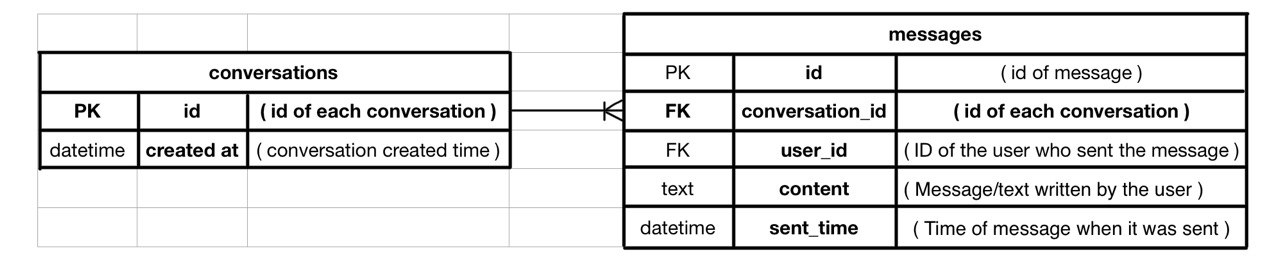

Assume only 2 users are a part of 1 conversation. 

**Write a SQL query to:**

+ Fetch **number of first message sent in a conversation in a day. Date range** - 1st Jan 2021 to 31st Dec 2021.

+ Fetch **number of first reply message sent in a conversation in a day. Date range** - 1st Jan 2021 to 31st Dec 2021.

+ **Total conversation with 3 way messaging.** 3 way messaging **means User1 sent the message, then User2 replied and finally User1 messaged back.** 






I have Created a sample table as follows to work on the query requirements , it is as follows

**Conversations Table**

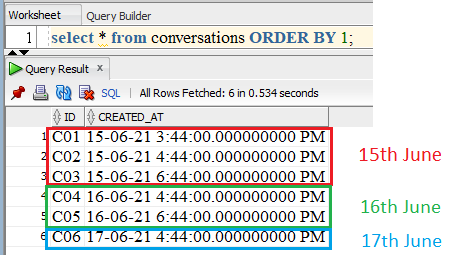

**Messages Table**

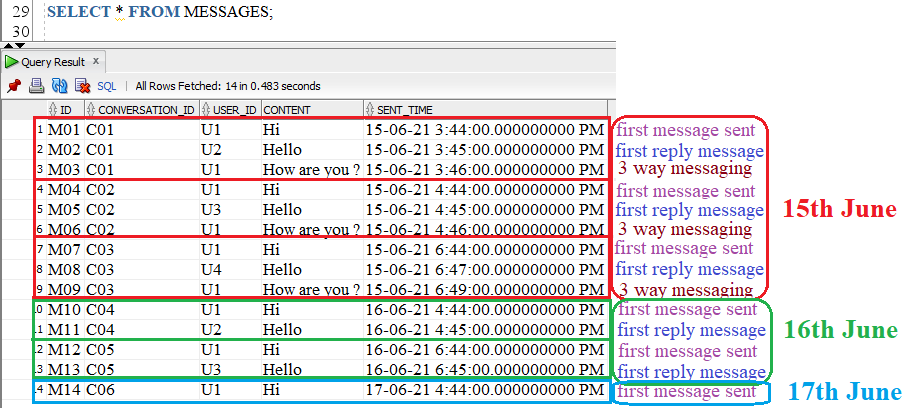

1) Fetch **number of first message sent in a conversation in a day. Date range** - 1st Jan 2021 to 31st Dec 2021.



**Query :**

SELECT date_, SUM(count_) FROM

                                        (
                                            SELECT
                                                to_date(to_char(c.created_at, 'DD-MM-YYYY')) AS date_,
                                                COUNT(DISTINCT m.conversation_id)                AS count_
                                            FROM conversations c, messages m
                                            WHERE c.id = m.conversation_id
                                                AND to_date(to_char(c.created_at, 'DD-MM-YYYY')) BETWEEN '01-01-21' AND '31-12-21'
                                            GROUP BY to_date(to_char(c.created_at, 'DD-MM-YYYY')), m.conversation_id
                                            HAVING COUNT(m.id) >= 1
                                        )
GROUP BY date_

Output

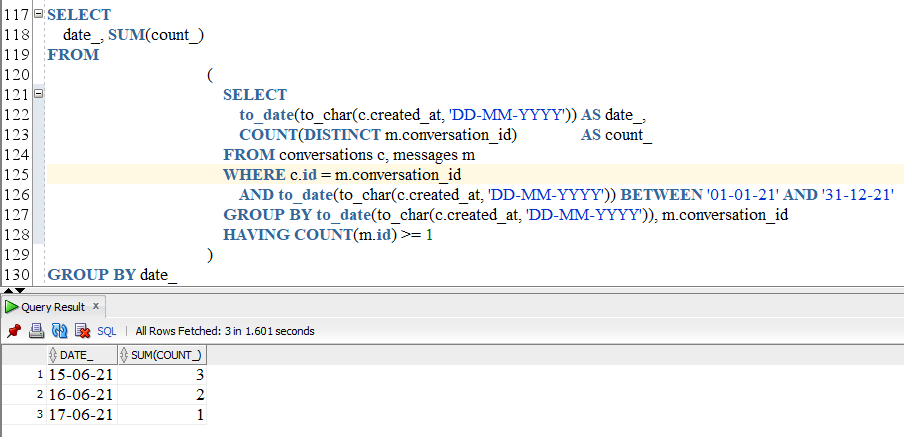

Here Output of inner query will be like this , 

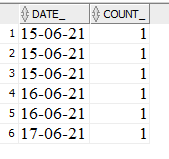

this will be considered as table 

and then a group by & count function will be applied over top of it on Outer side to get final output as below

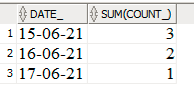

2) Fetch **number of first reply message sent in a conversation in a day. Date range** - 1st Jan 2021 to 31st Dec 2021.

for this question COUNT(m.id) >= 2 in queary instead of 1

SELECT date_, SUM(count_) FROM

                                        (
                                            SELECT
                                                to_date(to_char(c.created_at, 'DD-MM-YYYY')) AS date_,
                                                COUNT(DISTINCT m.conversation_id)                AS count_
                                            FROM conversations c, messages m
                                            WHERE c.id = m.conversation_id
                                                AND to_date(to_char(c.created_at, 'DD-MM-YYYY')) BETWEEN '01-01-21' AND '31-12-21'
                                            GROUP BY to_date(to_char(c.created_at, 'DD-MM-YYYY')), m.conversation_id
                                            HAVING COUNT(m.id) >= 2
                                        )
GROUP BY date_

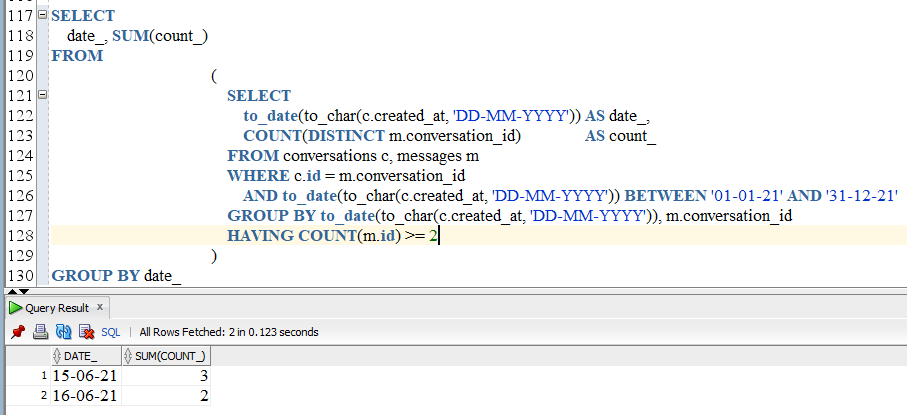

3) **Total conversation with 3 way messaging.** 3 way messaging **means User1 sent the message, then User2 replied and finally User1 messaged back.** 

for this question COUNT(m.id) >= 3 in queary instead of 2

SELECT date_, SUM(count_) FROM

                                        (
                                            SELECT
                                                to_date(to_char(c.created_at, 'DD-MM-YYYY')) AS date_,
                                                COUNT(DISTINCT m.conversation_id)                AS count_
                                            FROM conversations c, messages m
                                            WHERE c.id = m.conversation_id
                                                AND to_date(to_char(c.created_at, 'DD-MM-YYYY')) BETWEEN '01-01-21' AND '31-12-21'
                                            GROUP BY to_date(to_char(c.created_at, 'DD-MM-YYYY')), m.conversation_id
                                            HAVING COUNT(m.id) >= 3
                                        )
GROUP BY date_

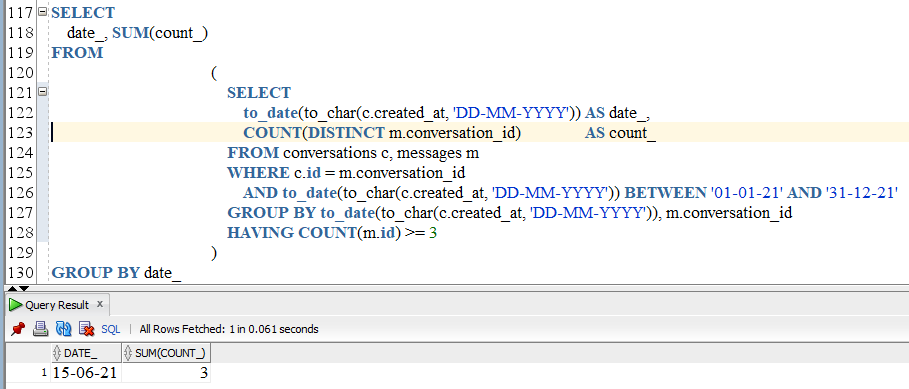

## <h3 align="center"> Thank You <h3/>


## <h3 align="center"> Crafted with ♥ for Aisle <h3/>
